## time模块— Time access and conversions

This module provides various time-related functions.
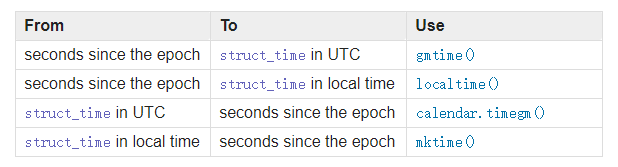

### Functions

#### time.asctime([t])
Convert a `tuple` or `struct_time` representing a time as returned by gmtime() or localtime() to a string of the following form: `'Sun Jun 20 23:21:05 1993'`. If t is not provided, the current time as returned by localtime() is used. Locale information is not used by asctime().

In [19]:
import time
import datetime
print(time.asctime())

print(time.asctime(datetime.datetime.now().timetuple()))

Wed Apr 24 15:34:33 2019
Wed Apr 24 15:34:33 2019


#### time.ctime([secs])
Convert a time expressed in seconds since the epoch to a string representing local time. 
If secs is not provided or None, the current time as returned by `time()` is used. `ctime(secs)` is equivalent to `asctime(localtime(secs))`. Locale information is not used by `ctime()`.

In [23]:
time.ctime(datetime.datetime.now().timestamp())

'Wed Apr 24 15:36:47 2019'

#### time.gmtime([secs])
Convert a time expressed in seconds since the epoch to a `struct_time` in UTC in which the dst flag is always zero. If secs is not provided or None, the current time as returned by time() is used. Fractions of a second are ignored. See above for a description of the struct_time object. See calendar.timegm() for the inverse of this function.

In [24]:
time.gmtime(datetime.datetime.now().timestamp())

time.struct_time(tm_year=2019, tm_mon=4, tm_mday=24, tm_hour=7, tm_min=39, tm_sec=19, tm_wday=2, tm_yday=114, tm_isdst=0)

#### time.localtime([secs])
Like gmtime() but converts to local time. If secs is not provided or None, the current time as returned by time() is used. The dst flag is set to 1 when DST applies to the given time.

In [25]:
time.localtime(datetime.datetime.now().timestamp())

time.struct_time(tm_year=2019, tm_mon=4, tm_mday=24, tm_hour=15, tm_min=40, tm_sec=7, tm_wday=2, tm_yday=114, tm_isdst=0)

#### time.mktime(t)
This is the inverse function of localtime(). Its argument is the struct_time or full 9-tuple (since the dst flag is needed; use -1 as the dst flag if it is unknown) which expresses the time in local time, not UTC. It returns a floating point number, for compatibility with time(). If the input value cannot be represented as a valid time, either OverflowError or ValueError will be raised (which depends on whether the invalid value is caught by Python or the underlying C libraries). The earliest date for which it can generate a time is platform-dependent.

In [29]:
time.mktime(datetime.datetime.now().timetuple())

1556091812.0

#### time.strftime(format[, t])
Convert a tuple or struct_time representing a time as returned by gmtime() or localtime() `to a string` as specified by the format argument. If t is not provided, the current time as returned by localtime() is used. format must be a string. ValueError is raised if any field in t is outside of the allowed range.

0 is a legal argument for any position in the time tuple; if it is normally illegal the value is forced to a correct one.

In [32]:
time.strftime('%Y-%m-%d,%a %H:%M:%S', time.gmtime())

'2019-04-24,Wed 07:47:44'

#### time.strptime(string[, format])
Parse a string representing a time according to a format. The return value is a struct_time as returned by gmtime() or localtime().

The format parameter uses the same directives as those used by strftime(); it defaults to "%a %b %d %H:%M:%S %Y" which matches the formatting returned by ctime(). If string cannot be parsed according to format, or if it has excess data after parsing, ValueError is raised. The default values used to fill in any missing data when more accurate values cannot be inferred are (1900, 1, 1, 0, 0, 0, 0, 1, -1). Both string and format must be strings.

In [34]:
time.strptime('2019-04-24,Wed 07:47:44','%Y-%m-%d,%a %H:%M:%S')

time.struct_time(tm_year=2019, tm_mon=4, tm_mday=24, tm_hour=7, tm_min=47, tm_sec=44, tm_wday=2, tm_yday=114, tm_isdst=-1)

### Classes in time module

#### class time.struct_time
The type of the time value sequence returned by `gmtime()`, `localtime()`, and `strptime()`.
<br>It is an object with a named tuple interface: values can be accessed by index and by attribute name. 
<br>The following values are present:
```
Index	Attribute	Values
0	tm_year	(for example, 1993)
1	tm_mon	range [1, 12]
2	tm_mday	range [1, 31]
3	tm_hour	range [0, 23]
4	tm_min	range [0, 59]
5	tm_sec	range [0, 61]; see (2) in strftime() description
6	tm_wday	range [0, 6], Monday is 0
7	tm_yday	range [1, 366]
8	tm_isdst	0, 1 or -1; see below
N/A	tm_zone	abbreviation of timezone name
N/A	tm_gmtoff	offset east of UTC in seconds
```

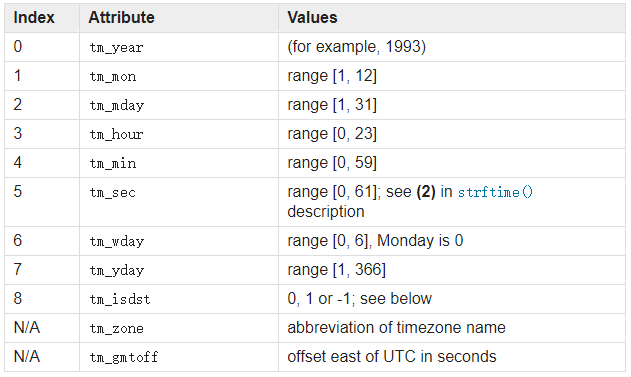

In [43]:
import time
help(time)

Help on built-in module time:

NAME
    time - This module provides various functions to manipulate time values.

DESCRIPTION
    There are two standard representations of time.  One is the number
    of seconds since the Epoch, in UTC (a.k.a. GMT).  It may be an integer
    or a floating point number (to represent fractions of seconds).
    The Epoch is system-defined; on Unix, it is generally January 1st, 1970.
    The actual value can be retrieved by calling gmtime(0).
    
    The other representation is a tuple of 9 integers giving local time.
    The tuple items are:
      year (including century, e.g. 1998)
      month (1-12)
      day (1-31)
      hours (0-23)
      minutes (0-59)
      seconds (0-59)
      weekday (0-6, Monday is 0)
      Julian day (day in the year, 1-366)
      DST (Daylight Savings Time) flag (-1, 0 or 1)
    If the DST flag is 0, the time is given in the regular time zone;
    if it is 1, the time is given in the DST time zone;
    if it is -1, mktime() sh